In [1]:
from datetime import date
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

# **Data Cleaning and Processing**

## Customer Address


In [2]:
# Loading the Customer Address Data from the excel file

cust_address = pd.read_excel('Raw_data.xlsx' , sheet_name='CustomerAddress')

In [3]:
# Checking first 5 rows

cust_address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [4]:
# Checking information of columns and data-types of Customer Address Data.

cust_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [5]:
# Checking for null value

cust_address.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

**There is no missing value in DataFrame**

In [6]:
# Checking for total row and column in data frame

print(f"Total records (rows) and (column) in the dataset: {cust_address.shape}")

Total records (rows) and (column) in the dataset: (3999, 6)


## 1. Check for Inconsistency in Data

Checking for inconsistent data / typo error data in colum **address, postcode, state and country**

## **State Column**

In [7]:
cust_address['state'].unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

In [8]:
cust_address['state'].value_counts()

state
NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: count, dtype: int64

In state column there is inconsistent. As **New South Wales** will be replaced by **NSW** and **Victoria** will be replaced by **VIC**

In [9]:
# Function to replace full state names with their short forms.

# def replace_state_name(state_name):
#     if state_name == 'New South Wales':
#         return 'NSW'
#     if state_name == 'Victoria':
#         return 'VIC'
#     else: 
#         return state_name

cust_address['state'] = cust_address['state'].replace('New South Wales','NSW').replace('Victoria','VIC')

In [10]:
# Rechecking state column

cust_address['state'].value_counts()

state
NSW    2140
VIC    1021
QLD     838
Name: count, dtype: int64

# **Country Column**

In [11]:
cust_address['country'].value_counts()

country
Australia    3999
Name: count, dtype: int64

Country column don't have any inconsistent

## **Postcode Column**

In [12]:
cust_address[['address','postcode', 'state' , 'country']].drop_duplicates().count()

address     3999
postcode    3999
state       3999
country     3999
dtype: int64

There is no inconsistent

## 2. Duplication Checks

We need to ensure that there is no duplication of records in the dataset. This may lead to error in data analysis due to poor data quality. If there are duplicate rows of data then we need to drop such records.

In [13]:
# Taking count of customer ID as this column is primery key

cust_address['customer_id'].duplicated().sum()

np.int64(0)

In [14]:
# taking the count of full dataset
cust_address.shape[0]

3999

In [15]:
# Taking count of customer ID as this column is primery key

cust_address['customer_id'].count()

np.int64(3999)

**Since the total count of customer id column and the count of whole dataset are same. There are no duplicate records in the dataset**

## 3. Exporting the Cleaned Customer Adderss DataSet to csv

In [16]:
cust_address.to_csv('CustomerAddress_Cleaned.csv', index=False)

## ------------------------------------------------- END -------------------------------------------------------

## Customer Demographic

In [17]:
# Loading the Customer Demographics Data from the excel file

cust_demo = pd.read_excel('Raw_data.xlsx' , sheet_name='CustomerDemographic')

In [18]:
cust_demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [19]:
cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

In [20]:
cust_demo.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [21]:
cust_demo.shape

(4000, 13)

## 1. Dropping Irrelevent Columns

**default is an irrelevent column. Hence it should be dropped.**

In [22]:
# Dropping the default column

cust_demo.drop(columns={'default'}, axis=1, inplace = True)

In [23]:
cust_demo.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure'],
      dtype='object')

## 2. Missing Values Check

In [24]:
cust_demo.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

**last_name, DOB, job_title, job_industry_category, tenure** all this column have missing values.

## Last Name

In [25]:
# Checking for the presence of first name and customer id in records where last name is missing.
cust_demo[cust_demo['last_name'].isnull()][['customer_id', 'first_name']].isnull().sum()

customer_id    0
first_name     0
dtype: int64

Since All customers have a customer_id and First name, all the customers are identifiable. Hence it is okay for to not have a last name. **Filling null last names with "None"**.

In [26]:
cust_demo['last_name'].fillna('None', axis = 0, inplace = True)

C:\Users\Bhask\AppData\Local\Temp\ipykernel_15380\3781475646.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cust_demo['last_name'].fillna('None', axis = 0, inplace = True)


In [27]:
cust_demo['last_name'].isnull().sum()

np.int64(0)

## Date of Birth

In [28]:
cust_demo['DOB'].isnull().mean()*100

np.float64(2.175)

**Since less than 5 % of data has null date of birth. we can remove the records where date of birth is null.**

In [29]:
drop_index = cust_demo[cust_demo['DOB'].isnull()].index
drop_index

Index([ 143,  167,  266,  289,  450,  452,  453,  479,  512,  525,  547,  581,
        598,  679,  684,  798,  838,  882,  891,  949,  974,  982,  995, 1037,
       1043, 1081, 1173, 1209, 1243, 1350, 1476, 1508, 1582, 1627, 1682, 1739,
       1772, 1779, 1805, 1917, 1937, 1989, 1999, 2020, 2068, 2164, 2204, 2251,
       2294, 2334, 2340, 2413, 2425, 2468, 2539, 2641, 2646, 2695, 2696, 2853,
       2919, 2962, 2998, 3011, 3085, 3150, 3221, 3222, 3254, 3287, 3297, 3311,
       3321, 3342, 3364, 3472, 3509, 3512, 3564, 3653, 3717, 3726, 3778, 3882,
       3930, 3934, 3997],
      dtype='int64')

In [30]:
cust_demo.drop(index = drop_index, axis = 0, inplace = True)

In [31]:
cust_demo['DOB'].isnull().sum()

np.int64(0)

In [32]:
# converting DOB to datetime datatype

cust_demo['DOB'] = pd.to_datetime(cust_demo['DOB'], format = '%Y-%m-%d')

### Creating Age Column for checking further descripency in data

In [33]:
# calculating age

today = date.today()
cust_demo['age'] = cust_demo['DOB'].apply(lambda dob: today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day)))

In [34]:
cust_demo['age'].describe()

count    3913.000000
mean       47.064401
std        12.796921
min        22.000000
25%        37.000000
50%        47.000000
75%        57.000000
max       181.000000
Name: age, dtype: float64

In [35]:
cust_demo[cust_demo['age'] > 100]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0,181


**Here we see a customer with age 181 which is an outlier. hence we need to remove this record.**

In [36]:
# droping column

age_index_drop = cust_demo[cust_demo['age']>100].index

cust_demo.drop(index=age_index_drop, inplace=True , axis=0)

## Tenure

In [37]:
cust_demo['tenure'].isnull().sum()

np.int64(0)

Ther is no missing value in Tenure

## Job Title

In [38]:
# cheking for null

cust_demo['job_title'].isnull().sum()

np.int64(497)

In [39]:
# checking how much percent of value is null
(cust_demo['job_title'].isnull().sum())/(cust_demo['job_title'].count())*100

np.float64(14.553440702781845)

**Since 14% of missing Job title is missing. We will replace null values with Missing**

In [40]:
## replacing null values with Missing

cust_demo['job_title'].fillna('Missing', axis = 0 , inplace = True)

C:\Users\Bhask\AppData\Local\Temp\ipykernel_15380\2814115009.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cust_demo['job_title'].fillna('Missing', axis = 0 , inplace = True)


In [41]:
cust_demo['job_title'].isnull().sum()

np.int64(0)

## Job Industry Category

In [42]:
# checking for null value
cust_demo['job_industry_category'].isnull().sum()

np.int64(656)

In [43]:
# taking the count of total row
cust_demo['job_industry_category'].count()

np.int64(3256)

In [44]:
# checking how much percent of value is null
(cust_demo['job_industry_category'].isnull().sum())/cust_demo['job_industry_category'].count()*100

np.float64(20.14742014742015)

**Since 20% of missing Job Industry Category is missing. We will replace null values with Missing**

In [45]:
# replacing null value with Missing
cust_demo['job_industry_category'].fillna('Missing', axis = 0, inplace = True)

C:\Users\Bhask\AppData\Local\Temp\ipykernel_15380\833752843.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cust_demo['job_industry_category'].fillna('Missing', axis = 0, inplace = True)


In [46]:
cust_demo['job_industry_category'].isnull().sum()

np.int64(0)

In [47]:
cust_demo.isnull().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
age                                    0
dtype: int64

**There is no missing value**

## 3. Inconsistency Check in Data
We will check whether there is inconsistent data / typo error data is present in the categorical columns.

The columns to be checked are **'gender', 'wealth_segment' ,'deceased_indicator', 'owns_car'**

## Gender

In [48]:
cust_demo['gender'].value_counts()

gender
Female    2037
Male      1872
F            1
Femal        1
M            1
Name: count, dtype: int64

In [49]:
# replacing values

cust_demo['gender'] = cust_demo['gender'].replace('F', 'Female').replace('M', 'Male').replace('Femal', 'Female')

In [50]:
cust_demo['gender'].value_counts()

gender
Female    2039
Male      1873
Name: count, dtype: int64

## Wealth Segment

In [51]:
# checking for wealth_segment
cust_demo['wealth_segment'].value_counts()

wealth_segment
Mass Customer        1954
High Net Worth        996
Affluent Customer     962
Name: count, dtype: int64

There is no Inconsistency

## Deceased Indicator

In [52]:
cust_demo['deceased_indicator'].value_counts()

deceased_indicator
N    3910
Y       2
Name: count, dtype: int64

## Owns a Car

In [53]:
cust_demo['owns_car'].value_counts()

owns_car
Yes    1974
No     1938
Name: count, dtype: int64

### Checking for duplicated row

In [54]:
cust_demo.duplicated().sum()

np.int64(0)

## Exporting the Cleaned Customer Demographic Data Set to csv

In [55]:
cust_demo.to_csv('CustomerDemographic_Cleaned.csv', index = False)

## ------------------------------------------------- END -------------------------------------------------------

# New Customer

In [56]:
# Loading the New Customer Data from the excel file

new_customer = pd.read_excel('Raw_data.xlsx' , sheet_name='NewCustomerList')

In [57]:
new_customer.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.81,1.0125,1.265625,1.075781,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.75,0.7500,0.937500,0.796875,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.71,0.7100,0.710000,0.710000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.50,0.6250,0.625000,0.625000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.99,0.9900,1.237500,1.237500,4,4,1.703125


In [58]:
new_customer.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

## 1. Dropping Irrelevent Columns

In [59]:
# droping unwanted column

new_customer.drop(columns = ['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20'], axis = 1, inplace = True)

In [60]:
new_customer.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

## 2. Missing Values Check

#### Last Name

In [61]:
# checking for null value

new_customer['last_name'].isnull().sum()

np.int64(29)

In [62]:
# replacing null value with None

new_customer['last_name'].fillna('None', axis = 0, inplace = True)

C:\Users\Bhask\AppData\Local\Temp\ipykernel_15380\2784317267.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_customer['last_name'].fillna('None', axis = 0, inplace = True)


In [63]:
new_customer['last_name'].isnull().sum()

np.int64(0)

## Date of Birth

In [64]:
# checking for null value

new_customer['DOB'].isnull().sum()

np.int64(17)

In [65]:
new_customer[new_customer['DOB'].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
59,Normy,Goodinge,U,5,NaN,Associate Professor,IT,Mass Customer,N,No,4,7232 Fulton Parkway,3810,VIC,Australia,5,57,1.375000
226,Hatti,Carletti,U,35,NaN,Legal Assistant,IT,Affluent Customer,N,Yes,11,6 Iowa Center,2519,NSW,Australia,9,226,1.112500
324,Rozamond,Turtle,U,69,NaN,Legal Assistant,IT,Mass Customer,N,Yes,3,57025 New Castle Street,3850,VIC,Australia,3,324,1.010000
358,Tamas,Swatman,U,65,NaN,Assistant Media Planner,Entertainment,Affluent Customer,N,No,5,78 Clarendon Drive,4551,QLD,Australia,8,358,0.980000
360,Tracy,Andrejevic,U,71,NaN,Programmer II,IT,Mass Customer,N,Yes,11,5675 Burning Wood Trail,3030,VIC,Australia,7,361,0.977500
374,Agneta,McAmish,U,66,NaN,Structural Analysis Engineer,IT,Mass Customer,N,No,15,5773 Acker Way,4207,QLD,Australia,6,375,0.960000
434,Gregg,Aimeric,U,52,NaN,Internal Auditor,IT,Mass Customer,N,No,7,72423 Surrey Street,3753,VIC,Australia,5,433,0.906250
439,Johna,Bunker,U,93,NaN,Tax Accountant,IT,Mass Customer,N,Yes,14,3686 Waubesa Way,3065,VIC,Australia,6,436,0.903125
574,Harlene,Nono,U,69,NaN,Human Resources Manager,IT,Mass Customer,N,No,12,0307 Namekagon Crossing,2170,NSW,Australia,7,575,0.796875
598,Gerianne,Kaysor,U,15,NaN,Project Manager,IT,Affluent Customer,N,No,5,882 Toban Lane,2121,NSW,Australia,11,599,0.775000


In [66]:
# droping row from date of birth column

droping_index = new_customer[new_customer['DOB'].isnull()].index
new_customer.drop(index = droping_index, axis = 0, inplace = True)

In [67]:
new_customer['DOB'].isnull().sum()

np.int64(0)

## Creating Age Column

In [68]:
# changing date of birth column datatype
new_customer['DOB']= pd.to_datetime(new_customer['DOB'])

In [69]:
new_customer['DOB'].dtypes

dtype('<M8[ns]')

In [70]:
# calculating age

today = date.today()
new_customer['age']= new_customer['DOB'].apply(lambda dob: today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day)))

In [71]:
new_customer['age'].describe()

count    983.000000
mean      53.301119
std       17.066865
min       22.000000
25%       41.000000
50%       52.000000
75%       67.000000
max       86.000000
Name: age, dtype: float64

## Creating age group column

In [72]:
import math

In [73]:
new_customer['age_group'] = new_customer['age'].apply(lambda x : (math.floor(x/10)+1)*10)

<Axes: xlabel='age_group', ylabel='Count'>

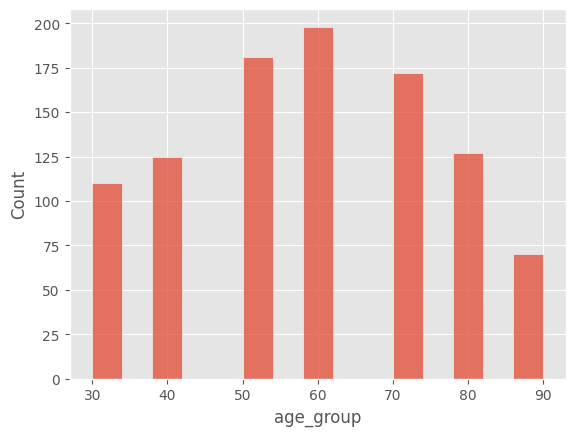

In [74]:
sns.histplot(data = new_customer, x= 'age_group')

In [75]:
new_customer.head(5)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age,age_group
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,67,70
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,54,60
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,50,60
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,46,50
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,59,60


## Job Title

In [76]:
# checking for null value
new_customer['job_title'].isnull().sum()

np.int64(105)

In [77]:
# taking count of total row 

new_customer['job_title'].count()

np.int64(878)

In [78]:
# checking how much percent of value is null
(new_customer['job_title'].isnull().sum())/(new_customer['job_title'].count())*100

np.float64(11.958997722095672)

**Since 12% of missing Job title is missing. We will replace null values with Missing**

In [79]:
new_customer['job_title'].fillna('Missing', axis = 0, inplace = True)

C:\Users\Bhask\AppData\Local\Temp\ipykernel_15380\935201011.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_customer['job_title'].fillna('Missing', axis = 0, inplace = True)


In [80]:
new_customer['job_title'].isnull().sum()

np.int64(0)

## Job Industry Category

In [81]:
# checking for null value
new_customer['job_industry_category'].isnull().sum()

np.int64(165)

In [82]:
# taking the count of total row
new_customer['job_industry_category'].count()

np.int64(818)

In [83]:
# checking how much percent of value is null
(new_customer['job_industry_category'].isnull().sum())/(new_customer['job_industry_category'].count())*100

np.float64(20.17114914425428)

**Since 20% of missing Job title is missing. We will replace null values with Missing**

In [84]:
# filling null value with Missing
new_customer['job_industry_category'].fillna('Missing', axis = 0, inplace = True)

C:\Users\Bhask\AppData\Local\Temp\ipykernel_15380\875540546.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_customer['job_industry_category'].fillna('Missing', axis = 0, inplace = True)


In [85]:
new_customer['job_industry_category'].isnull().sum()

np.int64(0)

In [86]:
new_customer.isnull().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
age                                    0
age_group                              0
dtype: int64

## 3. Inconsistency Check in Data

In [87]:
new_customer.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value', 'age', 'age_group'],
      dtype='object')

In [88]:
new_customer['gender'].value_counts()

gender
Female    513
Male      470
Name: count, dtype: int64

In [89]:
new_customer['owns_car'].value_counts()

owns_car
No     497
Yes    486
Name: count, dtype: int64

In [90]:
new_customer['wealth_segment'].value_counts()

wealth_segment
Mass Customer        499
High Net Worth       249
Affluent Customer    235
Name: count, dtype: int64

In [91]:
new_customer['deceased_indicator'].value_counts()

deceased_indicator
N    983
Name: count, dtype: int64

In [92]:
new_customer[['address','postcode','state']].count()

address     983
postcode    983
state       983
dtype: int64

In [93]:
new_customer['state'].value_counts()

state
NSW    499
VIC    258
QLD    226
Name: count, dtype: int64

In [94]:
new_customer['country'].value_counts()

country
Australia    983
Name: count, dtype: int64

## 4. Checking For Duplicates

In [95]:
new_customer.duplicated().count()

np.int64(983)

In [96]:
new_customer.count()

first_name                             983
last_name                              983
gender                                 983
past_3_years_bike_related_purchases    983
DOB                                    983
job_title                              983
job_industry_category                  983
wealth_segment                         983
deceased_indicator                     983
owns_car                               983
tenure                                 983
address                                983
postcode                               983
state                                  983
country                                983
property_valuation                     983
Rank                                   983
Value                                  983
age                                    983
age_group                              983
dtype: int64

**There is no duplicate in data** 

## 5. Exporting the Cleaned New Customers Data Set to csv

In [97]:
new_customer.to_csv('NewCustomer_Cleaned.csv', index = False)

## ------------------------------------------------- END -------------------------------------------------------

# Transactions

In [98]:
# Loading the Transactions Data from the excel file

transactions = pd.read_excel('Raw_data.xlsx' , sheet_name='Transactions')

In [99]:
transactions.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [100]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [101]:
transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [102]:
transactions.isnull().mean()*100

transaction_id             0.000
product_id                 0.000
customer_id                0.000
transaction_date           0.000
online_order               1.800
order_status               0.000
brand                      0.985
product_line               0.985
product_class              0.985
product_size               0.985
list_price                 0.000
standard_cost              0.985
product_first_sold_date    0.985
dtype: float64

## 1. Missing Values Check

### Online Order

In [103]:
transactions[transactions['online_order'].isnull()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
97,98,49,333,2017-06-23,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,37823.0
166,167,90,3177,2017-04-26,NaN,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,38482.0
169,170,6,404,2017-10-16,NaN,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,37838.0
250,251,63,1967,2017-04-11,NaN,Approved,Solex,Standard,medium,medium,1483.20,99.59,42145.0
300,301,78,2530,2017-03-24,NaN,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,35455.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19514,19515,51,690,2017-01-22,NaN,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19573,19574,18,1735,2017-01-15,NaN,Approved,Solex,Standard,medium,medium,575.27,431.45,41345.0
19580,19581,49,1933,2017-10-12,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,41064.0
19635,19636,98,1389,2017-07-26,NaN,Approved,Trek Bicycles,Standard,high,medium,358.39,215.03,38002.0


**we can perform mode imputation for this categorical column and replace null value with mode of the column**

In [104]:
transactions['online_order'].mode()

0    1.0
Name: online_order, dtype: float64

In [105]:
transactions['online_order'].fillna('1', axis = 0, inplace = True)

C:\Users\Bhask\AppData\Local\Temp\ipykernel_15380\3432893078.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  transactions['online_order'].fillna('1', axis = 0, inplace = True)
C:\Users\Bhask\AppData\Local\Temp\ipykernel_15380\3432893078.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  transactions['online_order'].fillna('1', axis = 0, inplace = T

In [106]:
# changing the data type
transactions['online_order'] = transactions['online_order'].astype('float')

### Brand, Product Line, Product Class, Product Size, Standard Cost, Product First Sold Date

In [107]:
transactions[transactions['brand'].isnull()][['brand', 'product_line', 'product_class', 'product_size', 
                                'standard_cost', 'product_first_sold_date']].isnull().sum()

brand                      197
product_line               197
product_class              197
product_size               197
standard_cost              197
product_first_sold_date    197
dtype: int64

In [108]:
records_to_drop  = transactions[transactions['brand'].isnull()][['brand', 'product_line', 'product_class', 'product_size', 
                                'standard_cost', 'product_first_sold_date']].index

In [109]:
# dropped null values

transactions.drop(index = records_to_drop, axis = 0, inplace = True )

In [110]:
transactions.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [111]:
transactions.shape[0]

19803

### 2. Creating a new column "Profit"

In [112]:
transactions['profit'] = transactions['list_price'] - transactions['standard_cost']

<Axes: xlabel='profit', ylabel='Count'>

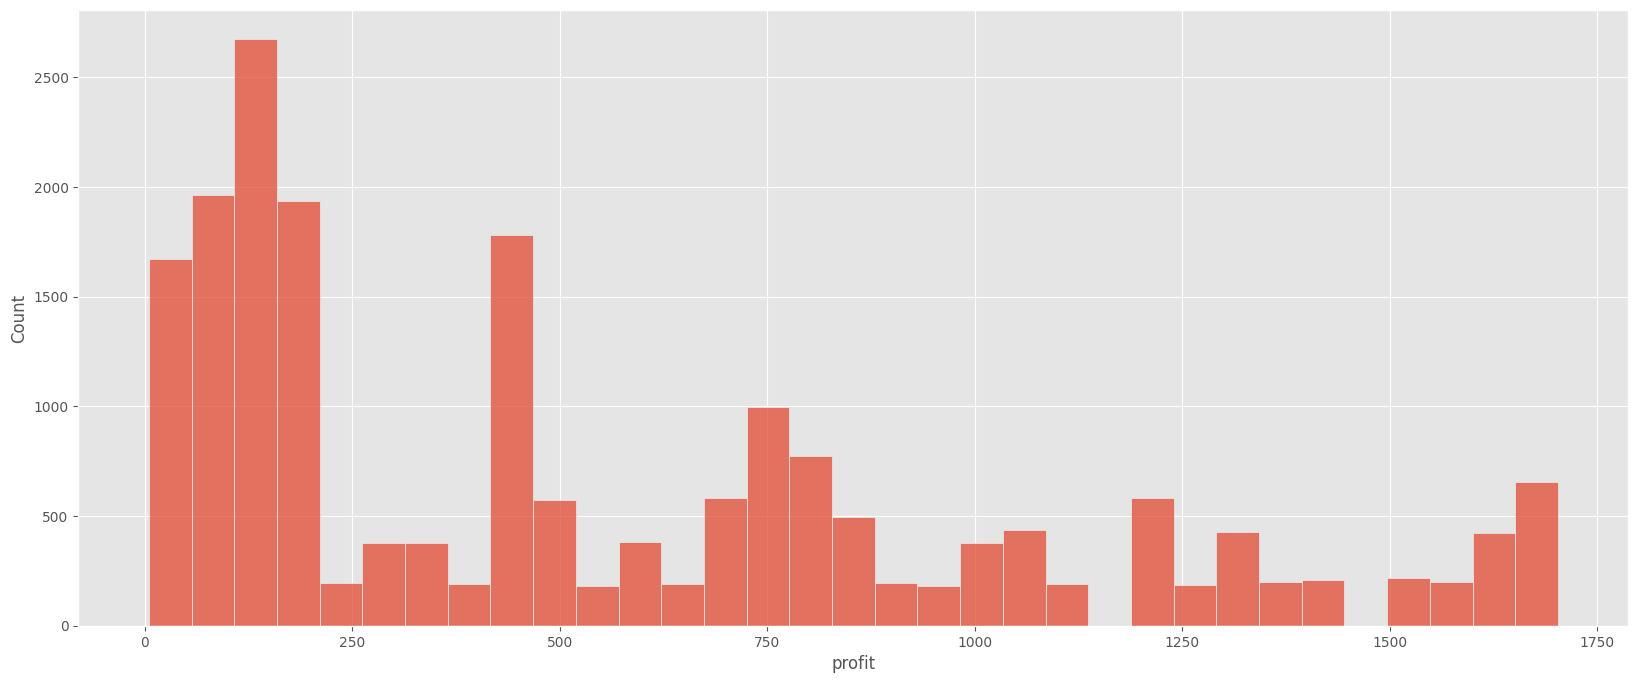

In [113]:
# Dystribution of the Profit Column
plt.figure(figsize=(20,8))
sns.histplot(transactions['profit'])

## 3. Inconsistency Check in Data

In [114]:
transactions.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'profit'],
      dtype='object')

### Order Status

In [115]:
transactions['order_status'].value_counts()

order_status
Approved     19625
Cancelled      178
Name: count, dtype: int64

**There is no Inconsistency in order status column**

### Brand

In [116]:
transactions['brand'].value_counts()

brand
Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: count, dtype: int64

**There is no Inconsistency in brand column**

### Product Line

In [117]:
transactions['product_line'].value_counts()

product_line
Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: count, dtype: int64

**There is no Inconsistency in product _line column**

### Product Class

In [118]:
transactions['product_class'].value_counts()

product_class
medium    13826
high       3013
low        2964
Name: count, dtype: int64

**There is no Inconsistency in product class column**

### Product Size

In [119]:
transactions['product_size'].value_counts()

product_size
medium    12990
large      3976
small      2837
Name: count, dtype: int64

**There is no Inconsistency in product _size column**

## 4. Duplication Checks

In [120]:
transactions.duplicated().count()

np.int64(19803)

In [121]:
transactions.count()

transaction_id             19803
product_id                 19803
customer_id                19803
transaction_date           19803
online_order               19803
order_status               19803
brand                      19803
product_line               19803
product_class              19803
product_size               19803
list_price                 19803
standard_cost              19803
product_first_sold_date    19803
profit                     19803
dtype: int64

In [122]:
transactions.shape[0]

19803

**Since both the numbers are same. There are no duplicate records in the dataset**

## 5. Exporting the Cleaned transaction DataSet to csv


In [123]:
transactions.to_csv('Transactions_Cleaned.csv', index = False)

## ------------------------------------------------- END -------------------------------------------------------

In [124]:
# Merging both the Transaction Dataset and Customer Demographics Dataset based on customer_id.

merg_trans_cust = transactions.merge(cust_demo, on = 'customer_id', how = 'inner')

In [125]:
merg_trans_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19354 entries, 0 to 19353
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19354 non-null  int64         
 1   product_id                           19354 non-null  int64         
 2   customer_id                          19354 non-null  int64         
 3   transaction_date                     19354 non-null  datetime64[ns]
 4   online_order                         19354 non-null  float64       
 5   order_status                         19354 non-null  object        
 6   brand                                19354 non-null  object        
 7   product_line                         19354 non-null  object        
 8   product_class                        19354 non-null  object        
 9   product_size                         19354 non-null  object        
 10  list_price

## 1. RFM Analysis

In [126]:
# the latest transaction date

last_trans_date = merg_trans_cust['transaction_date'].max()
last_trans_date

Timestamp('2017-12-30 00:00:00')

**Taking the last transaction date as a reference date for comparision and 
finding the number of days between a transaction date and last transaction date to compute the recency.**

**Creating a RFM table that will contain all the values for recency , frequency and Monetray data.** 

In [127]:
# Creating a RFM table that will contain all the values for recency , frequency and Monetray data. 

rfm_table = merg_trans_cust.groupby(['customer_id']).agg({'transaction_date': lambda date : (last_trans_date - date.max()).days,
                                             'transaction_id': 'count',
                                             'profit': 'sum'})

In [128]:
rfm_table.head()

,transaction_date,transaction_id,profit
customer_id,,,
1,7,11,3018.09
2,128,3,2226.26
3,102,8,3362.81
4,195,2,220.57
5,16,6,2394.94


In [129]:
# Renaming column names to appropiate names

rfm_table.rename(columns = {'transaction_date': 'recency',
                           'transaction_id': 'frequency',
                            'profit':'monetary'}, inplace = True)

In [130]:
rfm_table.describe()

,recency,frequency,monetary
count,3416.000000,3416.000000,3416.000000
mean,61.636710,5.665691,3120.489830
std,58.528636,2.310852,1770.197523
min,0.000000,1.000000,15.080000
25%,18.000000,4.000000,1834.892500
50%,44.000000,6.000000,2848.865000
75%,86.000000,7.000000,4170.790000
max,353.000000,14.000000,11668.950000


In [131]:
# Dividing the recency, frequency and monetary into 4 quartiles (25%, 50%, 75% and max).
# These values will help us to calculate RFM score for a customer and classify based on their RFM score.

rfm_table['r_quartile'] = pd.qcut(rfm_table['recency'], 4, ['4','3','2','1'])
rfm_table['f_quartile'] = pd.qcut(rfm_table['frequency'], 4, ['1','2','3','4'])
rfm_table['m_quartile'] = pd.qcut(rfm_table['monetary'], 4, ['1','2','3','4'])

In [132]:
rfm_table.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
customer_id,,,,,,
1,7,11,3018.09,4,4,3
2,128,3,2226.26,1,1,2
3,102,8,3362.81,1,4,3
4,195,2,220.57,1,1,1
5,16,6,2394.94,4,2,2


In [133]:
# created new column rfm_segment

rfm_table['rfm_segment'] = rfm_table['r_quartile'].astype('str') + rfm_table['f_quartile'].astype('str') + rfm_table['m_quartile'].astype('str')

In [134]:
# Caluclation of RFM Score.
# created new column rfm_score
rfm_table['rfm_score'] = rfm_table[['r_quartile', 'f_quartile', 'm_quartile']].astype('int').sum(axis = 1)

In [135]:
rfm_table.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_segment,rfm_score
customer_id,,,,,,,,
1,7,11,3018.09,4,4,3,443,11
2,128,3,2226.26,1,1,2,112,4
3,102,8,3362.81,1,4,3,143,8
4,195,2,220.57,1,1,1,111,3
5,16,6,2394.94,4,2,2,422,8


In [136]:
# # Assigning a title to a customer.
rfm_table['customer_rfm_label'] = pd.qcut(rfm_table['rfm_score'], 4, ['Bronze','Silver','Gold','Platinum'])

In [137]:
rfm_table

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_segment,rfm_score,customer_rfm_label
customer_id,,,,,,,,,
1,7,11,3018.09,4,4,3,443,11,Platinum
2,128,3,2226.26,1,1,2,112,4,Bronze
3,102,8,3362.81,1,4,3,143,8,Gold
4,195,2,220.57,1,1,1,111,3,Bronze
5,16,6,2394.94,4,2,2,422,8,Gold
...,...,...,...,...,...,...,...,...,...
3496,256,4,2045.84,1,1,2,112,4,Bronze
3497,52,3,1648.32,2,1,1,211,4,Bronze
3498,127,6,3147.33,1,2,3,123,6,Silver


In [138]:
merg_trans_cust['age_group'] = merg_trans_cust['age'].apply(lambda x : (math.floor(x/10)+1)*10)
merg_trans_cust.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_group
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,70,80
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,45,50
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,9,1977-06-03,Desktop Support Technician,Retail,Affluent Customer,N,No,22.0,47,50
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,83,1962-01-14,Staff Scientist,Financial Services,Mass Customer,N,No,16.0,63,70
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,29,1996-12-15,Missing,Retail,Affluent Customer,N,Yes,2.0,28,30


## Merging both RFM Table with Transaction and Customer Tables
The RFM_Table dataframe is merged with the Transactions and Customer Demographics datasets, to gain depper insights of Customer Segemnts along with transactions. The dataframes are joined based on customer_ids from both the datasets

In [139]:
cust_trans_rfm = merg_trans_cust.merge(rfm_table, on = 'customer_id', how = 'inner')

In [140]:
cust_trans_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19354 entries, 0 to 19353
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19354 non-null  int64         
 1   product_id                           19354 non-null  int64         
 2   customer_id                          19354 non-null  int64         
 3   transaction_date                     19354 non-null  datetime64[ns]
 4   online_order                         19354 non-null  float64       
 5   order_status                         19354 non-null  object        
 6   brand                                19354 non-null  object        
 7   product_line                         19354 non-null  object        
 8   product_class                        19354 non-null  object        
 9   product_size                         19354 non-null  object        
 10  list_price

## Creating a Detail Customer title / tag based on RFM Segment
An extended version of customer title is made which divides the entire number of customers into 11 groups. The groups are mainly Platinum Customers, Very Loyal, Becoming Loyal, Recent Customers, Potential Customers, Late Bloomer, Loosing Customers, High Risk Customers, Almost Lost Customers, Evasive Customers and Lost Customers.
The demarkation of customers into the above mentioned groups is based on their RFM scores.

In [141]:
# Function as a lookup to appropiate customer titles based on RFM score.

def cust_score_title_lkup(cols):
    
    rfm_score = cols[0]
    
    if rfm_score >= 444:
        return 'Platinum Customer'
    elif rfm_score >=433 and rfm_score < 444:
        return 'Very Loyal'
    elif rfm_score >=421 and rfm_score < 433:
        return 'Becoming Loyal'
    elif rfm_score >=344 and rfm_score < 421:
        return 'Recent Customer'
    elif rfm_score >=323 and rfm_score < 344:
        return 'Potential Customer'
    elif rfm_score >=311 and rfm_score < 323:
        return 'Late Bloomer'
    elif rfm_score >=224 and rfm_score < 311:
        return 'Loosing Customer'
    elif rfm_score >=212 and rfm_score < 224:
        return 'High Risk Customer'
    elif rfm_score >=124 and rfm_score < 212:
        return 'Almost Lost Customer'
    elif rfm_score >=112 and rfm_score < 124:
        return 'Evasive Customer'
    else :
        return 'Lost Customer'

In [142]:
cust_trans_rfm['detail_cust_title']= cust_trans_rfm[['rfm_segment']].astype('int').apply(cust_score_title_lkup, axis = 1)

C:\Users\Bhask\AppData\Local\Temp\ipykernel_15380\1375572388.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rfm_score = cols[0]


In [143]:
cust_trans_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19354 entries, 0 to 19353
Data columns (total 37 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19354 non-null  int64         
 1   product_id                           19354 non-null  int64         
 2   customer_id                          19354 non-null  int64         
 3   transaction_date                     19354 non-null  datetime64[ns]
 4   online_order                         19354 non-null  float64       
 5   order_status                         19354 non-null  object        
 6   brand                                19354 non-null  object        
 7   product_line                         19354 non-null  object        
 8   product_class                        19354 non-null  object        
 9   product_size                         19354 non-null  object        
 10  list_price

## 2. Exporting to CSV File

In [144]:
cust_trans_rfm.to_csv('Cust_Trans_RFM.csv', index = False)

# **Data Analysis and Exploration**

### New Customer vs Old Customer Age Distributions

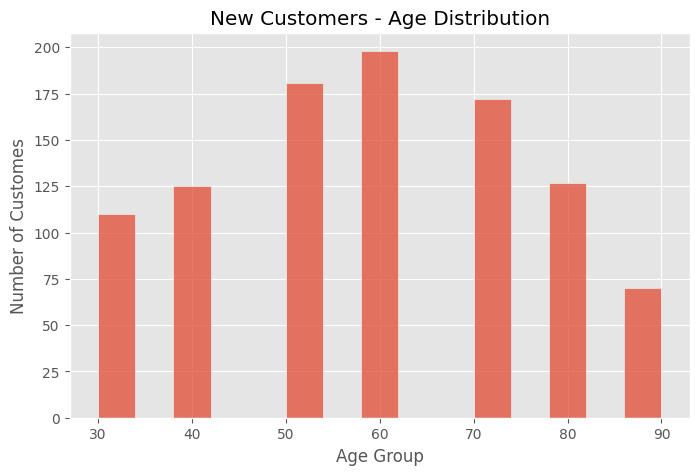

In [146]:
plt.figure(figsize=(8,5))
sns.histplot(new_customer['age_group'])
plt.xlabel('Age Group')
plt.ylabel('Number of Customes')
plt.title('New Customers - Age Distribution')
plt.savefig('New Customers - Age Distribution.jpg');

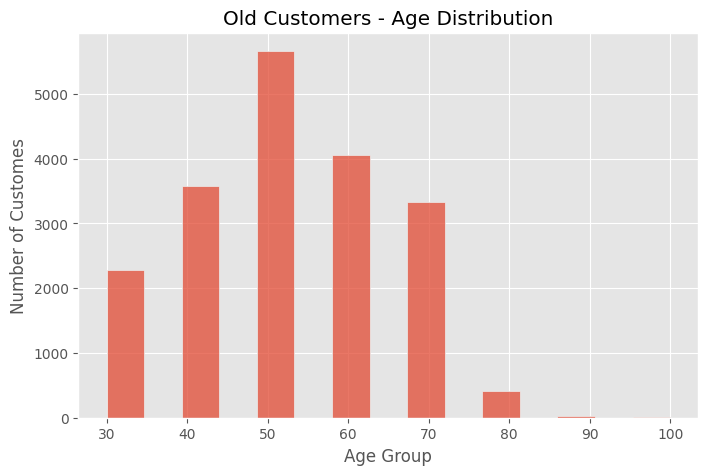

In [147]:
plt.figure(figsize=(8,5))
sns.histplot(cust_trans_rfm['age_group'], kde=False, bins=15)
plt.xlabel('Age Group')
plt.ylabel('Number of Customes')
plt.title('Old Customers - Age Distribution')
plt.savefig('Old Customers - Age Distribution.jpg');

## Bike related purchases over last 3 years by gender

In [148]:
purchasebygender = cust_trans_rfm.groupby('gender').agg({'past_3_years_bike_related_purchases': 'sum'}).reset_index()

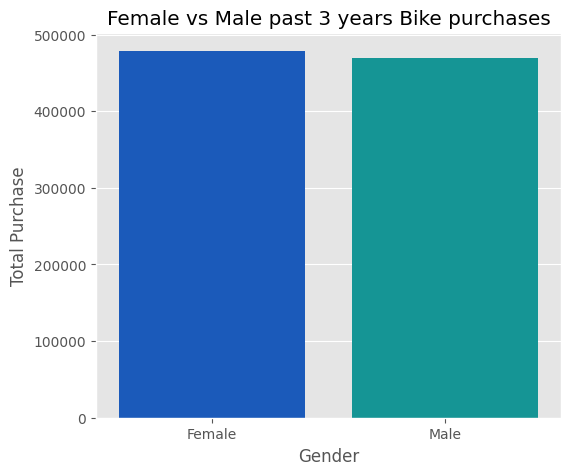

In [149]:
plt.figure(figsize=(6, 5)) 
sns.barplot(x = 'gender', y = 'past_3_years_bike_related_purchases', data = purchasebygender, hue = 'gender' , palette= "winter") 
plt.title('Bike-Related Purchases by Gender in the Past 3 Years')
plt.xlabel('Gender')
plt.ylabel('Total Purchase')
plt.title('Female vs Male past 3 years Bike purchases')
plt.show()

## Job Industry Customer Distribution

In [150]:
new_customer.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age,age_group
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,67,70
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,54,60
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,50,60
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,46,50
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,59,60


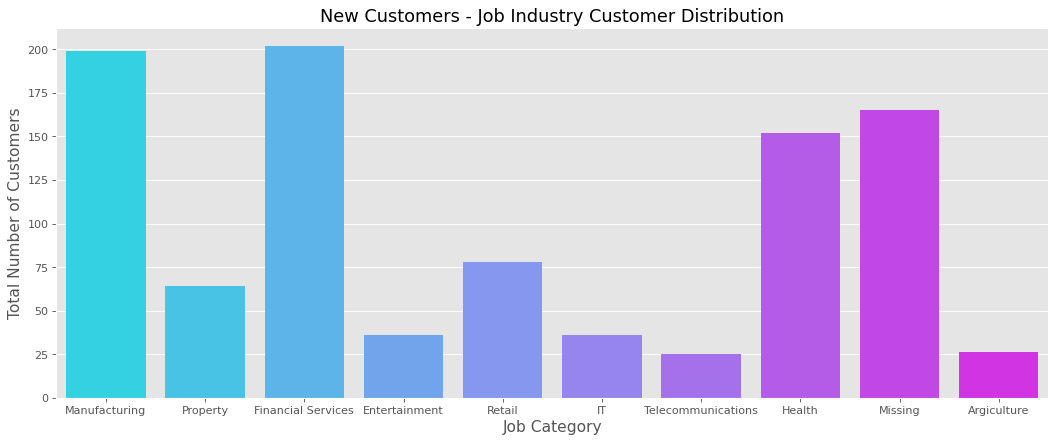

In [151]:
plt.figure(figsize = (16,6), dpi=80)
sns.countplot(x = new_customer['job_industry_category'], 
              data=new_customer[~(new_customer['job_industry_category']=='Missing')],
              hue =new_customer['job_industry_category'] ,
              palette= "cool") 
plt.title('New Customers - Job Industry Customer Distribution', fontsize=16)
plt.xlabel('Job Category', fontsize=14)
plt.ylabel('Total Number of Customers', fontsize=14)
plt.savefig('New Customers - Job Industry Customer Distribution.jpg')
plt.show() 

C:\Users\Bhask\AppData\Local\Temp\ipykernel_15380\2580959495.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = cust_trans_rfm['job_industry_category'],


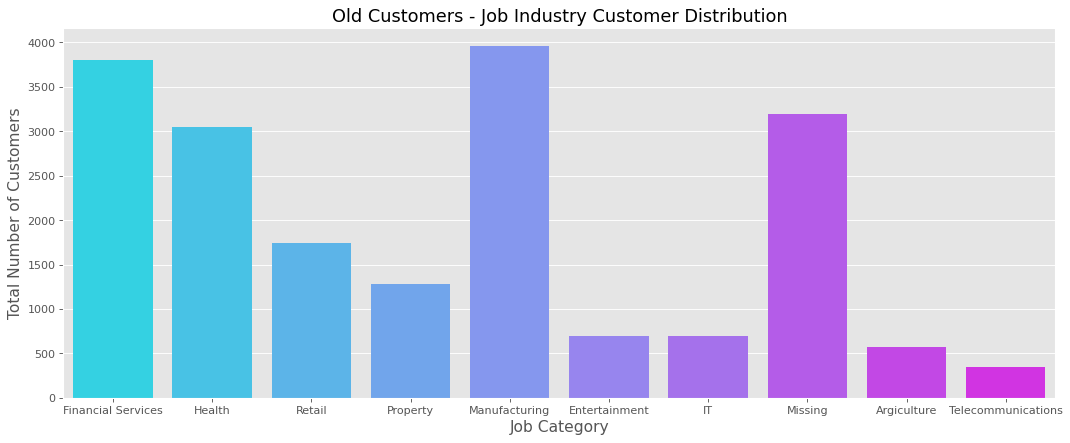

In [152]:
plt.figure(figsize = (16,6), dpi=80)
sns.countplot(x = cust_trans_rfm['job_industry_category'], 
              data=cust_trans_rfm[~(cust_trans_rfm['job_industry_category']=='Missing')],
              #hue =cust_trans_rfm['job_industry_category'] ,
              palette= "cool") 
plt.title('Old Customers - Job Industry Customer Distribution', fontsize=16)
plt.xlabel('Job Category', fontsize=14)
plt.ylabel('Total Number of Customers', fontsize=14)
plt.savefig('Old Customers - Job Industry Customer Distribution.jpg')
plt.show() 

Among the **New Customers** the highest amount of sales comes from customers having a **job in Manufacturing and Financial services sector**.The samllest chunk of sales comes from customers in **Agriculture sector and from Telecom sector**. Similar trend is observed among **Old Customers.**

### Wealth Segmentation by Age Group


In [153]:
# For new customers

segmentation_by_age_group = (new_customer.groupby(['wealth_segment', 'age_group']).size().reset_index()).rename(columns={0:'Number of Customers'})

In [154]:
segmentation_by_age_group

,wealth_segment,age_group,Number of Customers
0,Affluent Customer,30,36
1,Affluent Customer,40,22
2,Affluent Customer,50,48
3,Affluent Customer,60,48
4,Affluent Customer,70,34
5,Affluent Customer,80,33
6,Affluent Customer,90,14
7,High Net Worth,30,21
8,High Net Worth,40,41
9,High Net Worth,50,47


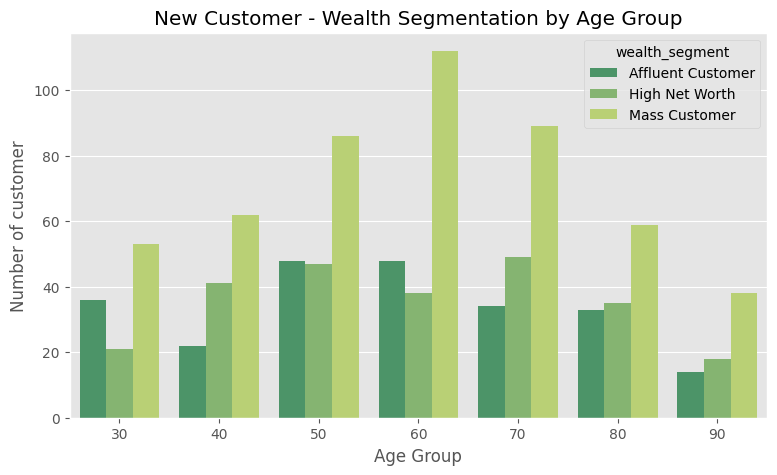

In [155]:
plt.figure(figsize= (9,5))
sns.barplot(x = 'age_group', y= 'Number of Customers', hue = 'wealth_segment', data = segmentation_by_age_group, palette = 'summer')
plt.title('New Customer - Wealth Segmentation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of customer')
plt.savefig('New Customers - Wealth Segmentation by Age Group.jpg')
plt.show()

In [156]:
# old Customers

old_segmentation_by_age_group = (cust_trans_rfm.groupby(['wealth_segment', 'age_group']).size().reset_index()).rename(columns={0:'Number of Customers'})

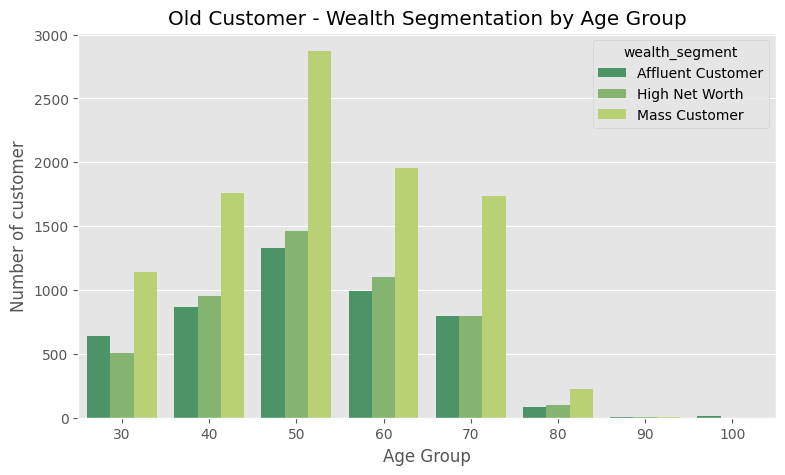

In [157]:
plt.figure(figsize= (9,5))
sns.barplot(x = 'age_group', y= 'Number of Customers', hue = 'wealth_segment', data = old_segmentation_by_age_group, palette = 'summer')
plt.title('Old Customer - Wealth Segmentation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of customer')
plt.savefig('old Customers - Wealth Segmentation by Age Group.jpg')
plt.show()


### Car owner across each State

In [158]:
# Merging the RFM data with Customer Address dataset.

cust_trans_addr = pd.merge(cust_trans_rfm , cust_address, left_on = 'customer_id' , 
                           right_on = 'customer_id', how='inner')

In [159]:
cust_trans_addr.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,m_quartile,rfm_segment,rfm_score,customer_rfm_label,detail_cust_title,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,1,211,4,Bronze,Almost Lost Customer,984 Hoepker Court,3064,VIC,Australia,6
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,4,334,10,Platinum,Potential Customer,4 Shopko Circle,2196,NSW,Australia,5
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,4,224,8,Gold,Loosing Customer,586 Miller Parkway,2835,NSW,Australia,1
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,3,133,7,Silver,Almost Lost Customer,1617 Harper Parkway,2096,NSW,Australia,10
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,4,244,10,Platinum,Loosing Customer,0601 Stephen Place,2292,NSW,Australia,7


In [160]:
# new customers
car_owner_across_each_state = cust_trans_addr.groupby(['owns_car', 'state']).agg({'customer_id':'count'}).reset_index()

In [161]:
car_owner_across_each_state

,owns_car,state,customer_id
0,No,NSW,5019
1,No,QLD,2077
2,No,VIC,2533
3,Yes,NSW,5308
4,Yes,QLD,2058
5,Yes,VIC,2332


Text(0.5, 1.0, 'Number of Customers who own a car by State')

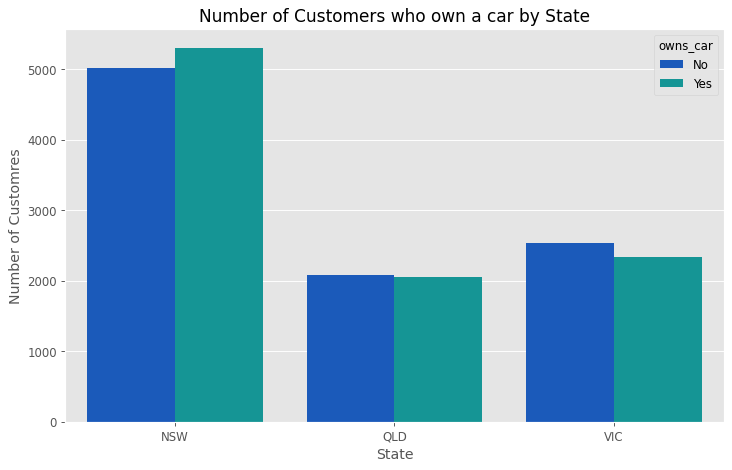

In [162]:
plt.figure(figsize = (10,6), dpi = 85)
sns.barplot(x= 'state', y = 'customer_id', hue = 'owns_car', data = car_owner_across_each_state, palette = 'winter')
plt.xlabel('State')
plt.ylabel('Number of Customres')
plt.title('Number of Customers who own a car by State')

NSW has the largest number of people that donot own a car. It seems that a higher amount of data is collected from NSW compared to other states. In QLD the distribution between customers having a car or not having is even. In Victoria the number is split evenly. Both the numbers are significantly lower than that of NSW

# RFM Analysis Scatter Plots

In [163]:
cust_trans_rfm.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_segment,rfm_score,customer_rfm_label,detail_cust_title
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,75,3,645.99,2,1,1,211,4,Bronze,Almost Lost Customer
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,20,7,4179.11,3,3,4,334,10,Platinum,Potential Customer
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,56,6,4965.43,2,2,4,224,8,Gold,Loosing Customer
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,121,7,3983.97,1,3,3,133,7,Silver,Almost Lost Customer
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,75,10,6646.00,2,4,4,244,10,Platinum,Loosing Customer


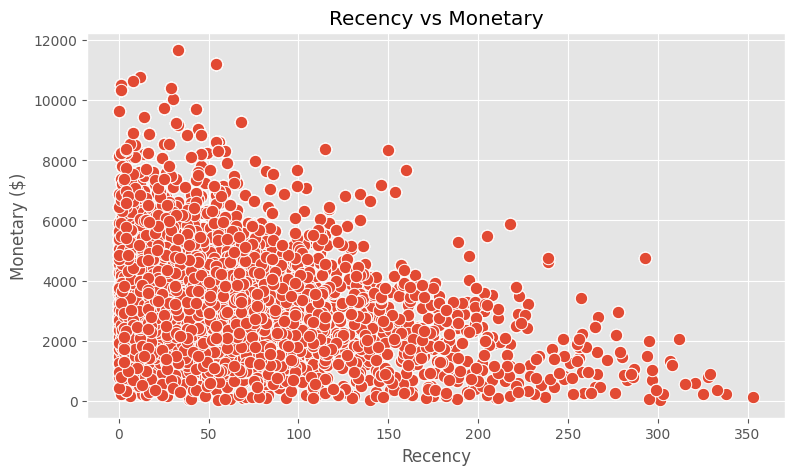

In [164]:
plt.figure(figsize=(9,5))
sns.scatterplot(x='recency' , y='monetary', data = cust_trans_rfm, s= 80)
plt.xlabel('Recency')
plt.ylabel('Monetary ($)')
plt.title('Recency vs Monetary')
plt.savefig('Recency vs Monetary.jpg')
plt.show()

<Figure size 1000x700 with 0 Axes>

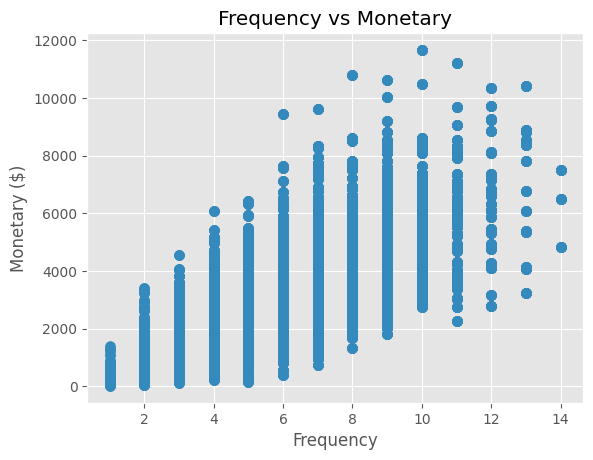

In [165]:
plt.figure(figsize=(10,7))
cust_trans_rfm.plot.scatter(x='frequency' , y='monetary', s = 50)
plt.xlabel('Frequency')
plt.ylabel('Monetary ($)')
plt.title('Frequency vs Monetary')
plt.savefig('Frequency vs Monetary.jpg')
plt.show()

C:\Users\Bhask\AppData\Local\Temp\ipykernel_15380\3736590168.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm_label = cust_trans_rfm.groupby('customer_rfm_label').agg({'customer_id':'count'}).reset_index()


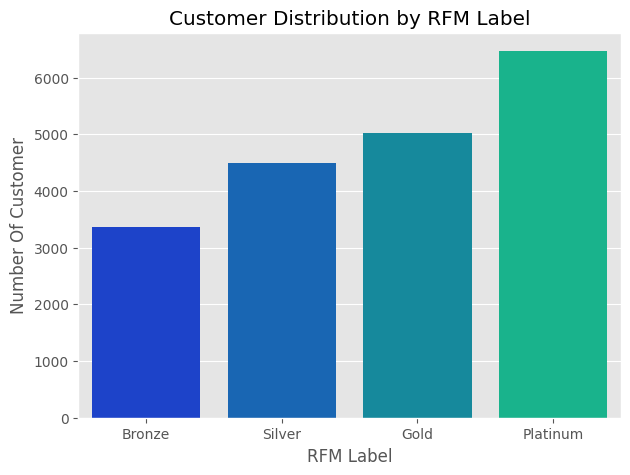

In [166]:
rfm_label = cust_trans_rfm.groupby('customer_rfm_label').agg({'customer_id':'count'}).reset_index()
plt.figure(figsize= (7,5))
sns.barplot(x= 'customer_rfm_label', y = 'customer_id', data = rfm_label, hue = 'customer_rfm_label', palette = 'winter')
plt.xlabel('RFM Label')
plt.ylabel('Number Of Customer')
plt.title('Customer Distribution by RFM Label')
plt.savefig('Customer Distribution by RFM Label.jpg')
plt.show()

In [167]:
grouped = cust_trans_rfm.groupby('detail_cust_title').agg({'customer_id':'count'}).reset_index()

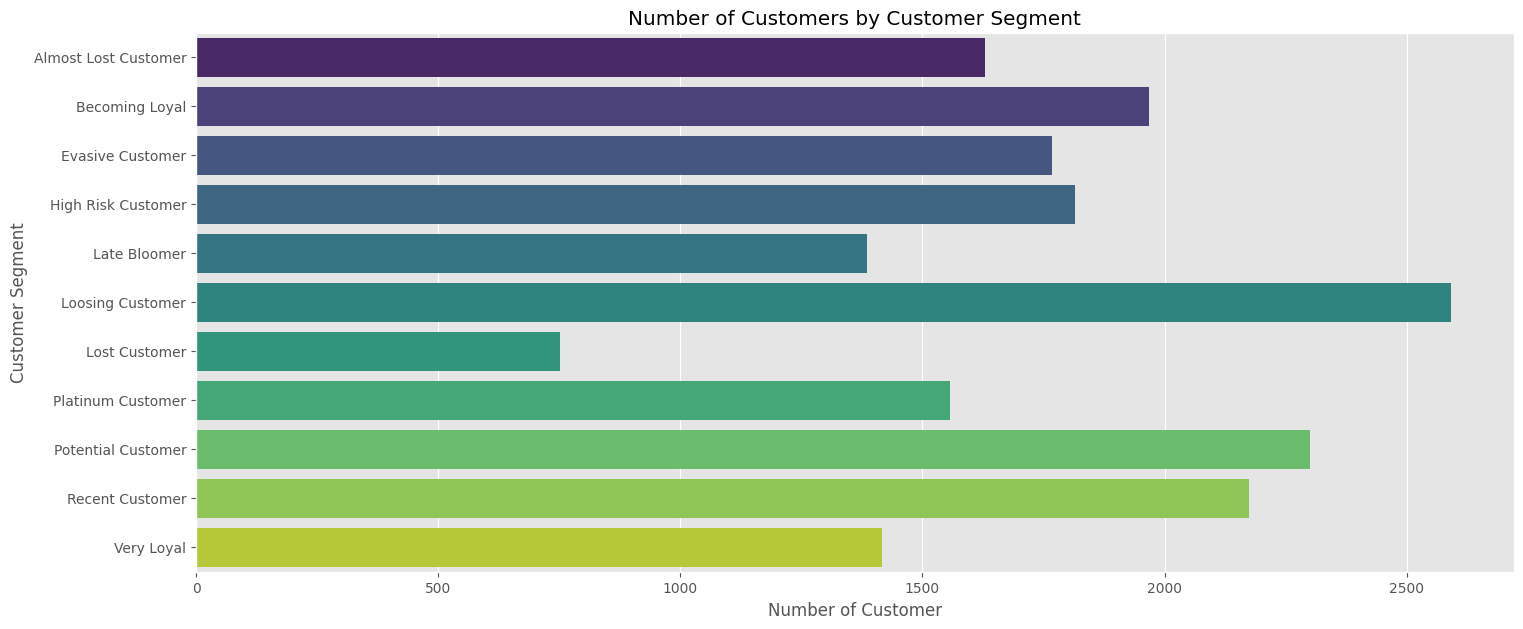

In [168]:
plt.figure(figsize= (17,7))
sns.barplot(data = grouped, x = 'customer_id', y= 'detail_cust_title', hue = 'detail_cust_title', palette='viridis' )
plt.xlabel('Number of Customer')
plt.ylabel('Customer Segment')
plt.title('Number of Customers by Customer Segment')
plt.savefig('Number of Customers by Customer Segment.jpg')
plt.show()

In [169]:
# converting the datatype 
cust_trans_rfm['m_quartile'] = cust_trans_rfm['m_quartile'].astype(int) 
cust_trans_rfm['f_quartile'] = cust_trans_rfm['f_quartile'].astype(int) 
cust_trans_rfm['r_quartile'] = cust_trans_rfm['r_quartile'].astype(int)

In [170]:

grouped_segment =cust_trans_rfm.groupby('detail_cust_title')[['m_quartile','f_quartile','r_quartile']].mean().reset_index()

In [171]:
# Melt the data for easier plotting with seaborn
grouped_melted = grouped_segment.melt(id_vars='detail_cust_title', value_vars=['m_quartile', 'f_quartile', 'r_quartile'],
                              var_name='Quartile', value_name='Average')

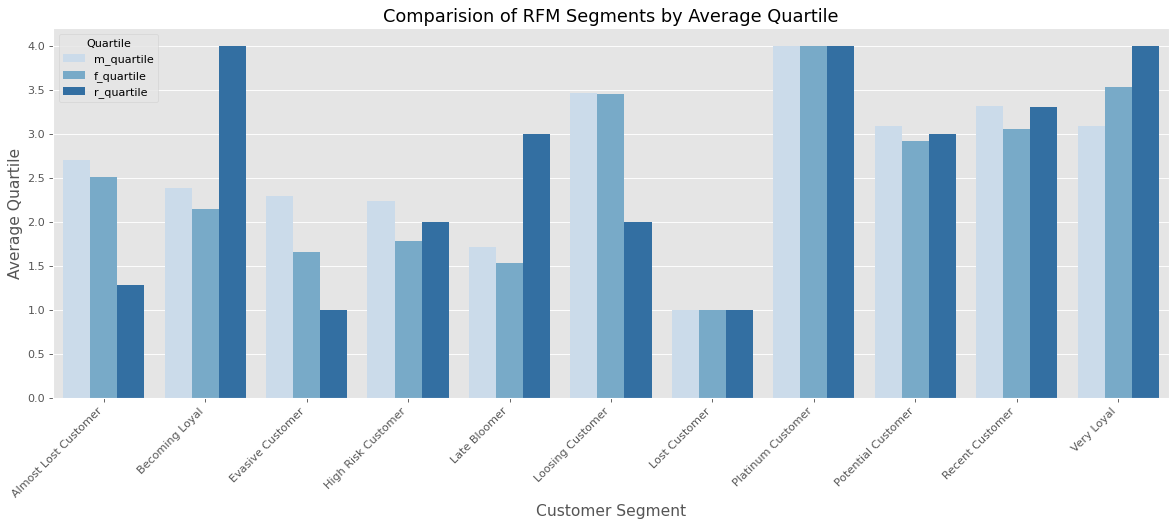

In [172]:
plt.figure(figsize=(18,6), dpi = 80)
sns.barplot(x='detail_cust_title', y='Average', hue='Quartile', data=grouped_melted, palette='Blues')
plt.xlabel('Customer Segment', fontsize=14)
plt.ylabel('Average Quartile', fontsize=14)
plt.title('Comparision of RFM Segments by Average Quartile', fontsize=16)
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.legend(title='Quartile')
plt.savefig('Comparision of RFM Segments by Average Quartile.jpg')
plt.show()